In [ ]:
# CS 8803 Efficient Machine Learning
# [First Name Last Name]
# GT ID: [GT ID here]
# Date: [Date here]

# Lab 01: Pruning

# [40%] Task 01: Basic Pruning Techniques and Observations

In this section, we will explore neural network pruning using PyTorch to understand how removing parameters affects model performance and efficiency. Pruning is a model compression technique that removes unnecessary weights or neurons from trained neural networks while attempting to maintain accuracy. We will use [PyTorch's pruning library](https://pytorch.org/tutorials/intermediate/pruning_tutorial.html) to implement various pruning strategies.

## What is Pruning?

Neural network pruning systematically removes weights, neurons, or entire layers from a trained model to reduce computational complexity and memory requirements. The key insight is that many neural networks are over-parameterized, containing redundant connections that can be eliminated without significantly impacting performance.

This section is worth **40%** of the total lab grade.

---

## Task Overview

Complete the following tasks in order:

1. **Download and visualize a dataset** - Load and explore the dataset characteristics
2. **Train a model from scratch** - Implement and train a baseline neural network
3. **Evaluate the baseline model** - Measure accuracy, model size, and inference time
4. **Apply pruning techniques** - Implement magnitude-based pruning with different sparsity levels
5. **Analyze pruning sensitivity** - Visualize how different layers respond to pruning
6. **Compare performance trade-offs** - Document accuracy vs. compression relationships
7. **Reflection and analysis** - Explain your observations and lessons learned

**Deliverables:** Code implementation, visualization plots, performance analysis, and written explanations for each task.

### [5%] Part a: Download the dataset and view an image.
Using torch vision, download the CIFAR10 dataset into the Google Colab.
Create a train and test set. In torchvision you can do this by doing:

```
torchvision.datasets.DATASET(root='./data',train=[true/false],download=True)
```
You do not need to add transformations.

Then, write a function to show an image from each class. The final result should look something like this:

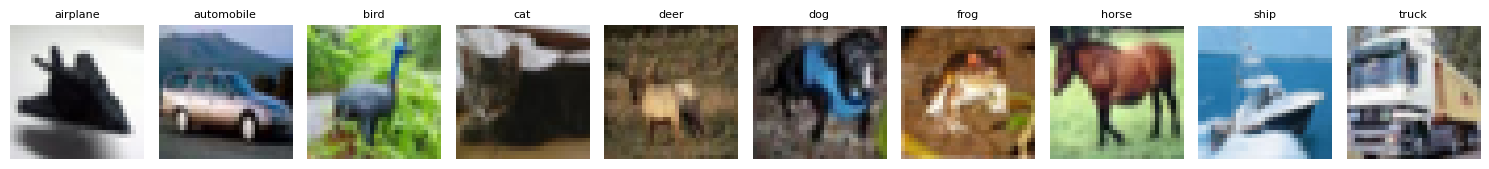


In [ ]:
#####
# Write your code here to download the CIAR10 dataset.
#

train_set = [code here]
test_set = [code here]
train_loader = DataLoader([code here])
test_loader = DataLoader([code here])

In [ ]:
####
# Write your code here to visualize all 10 classes from CIFAR10.
#

def show_one_image_per_class(dataset):
  [code here]

### [10%] Part b: Train a Neural Network, Count Parameters, and Evaluate

#### [5%] Training a ResNet Model for CIFAR-10

Using the provided network definition below, create a ResNet architecture configured for the CIFAR-10 dataset. You will need to:

1. **Configure the model architecture**:
  - Set the number of input channels to match CIFAR-10 images (3 RGB channels)
  - Set the number of output classes to match CIFAR-10 labels (10 classes)

2. **Train the model**:
  - Use the provided training code
  - Train for exactly **10 epochs**
  - Monitor training progress and loss

3. **Evaluate model performance**:
  - Test the trained model on the CIFAR-10 test set
  - Record the final accuracy

**Expected Results**: You should achieve approximately **85% accuracy**. Minor variations (±2-3%) are normal and acceptable. The goal is to understand the pruning process, not to create a state-of-the-art classifier.

#### [5%] Parameter Analysis

After training, analyze your model's structure by counting the parameters in each module:

1. **Count total parameters** in the entire model
2. **Count parameters by layer type** (convolutional layers, batch normalization, fully connected layers)
3. **Create a summary table** showing parameter distribution across the network
4. **Identify the most parameter-heavy modules**

This analysis will help you understand which parts of the network are most affected by pruning in the next section.

---

In [ ]:
# Model definition, DO NOT CHANGE
# You will be training this model.

def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))

        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Linear(512, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

# Model definition, DO NOT CHANGE
# You will be training this model.

In [ ]:
####
# Your model definition
#
# You need to finish this one.
model = ResNet9([in_chanenls],[num_classes])

In [ ]:
# Training code for model
# Complete the training loop where it says to modify.

def train(model, train_loader, num_epochs, lr=1e-3, weight_decay=1e-4):
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # IMPORTANT: You need to finish this.
        # Complete training loop here


        print(f"Epoch [{epoch+1:3d}] | Train Loss: {running_loss / len(train_loader):.4f} | LR: {scheduler.get_last_lr()[0]:.6f}")


In [ ]:
####
# Train the model.
#
# You need to finish this one.
train([code here])

In [ ]:
####
# Evaluate the model.
#
# You need to finish this one.

def evaluate_test(model,dataloader):
  # you write this
  # need to return test loss and accuracy
  # use cross-entropy loss
  # be sure to have torch.no_grad

test_loss, test_acc = evaluate_test(model,test_loader)

In [ ]:
####
# Count total parameters.
#
# You need to finish this.

def count_params(model):
  # need to return the number of parameters of the model
  # use model.parameters() and numel()
  # should get about 6.5 million

total_params = count_params([code here])

In [ ]:
####
# Count module specific parameters
# print the list of modules by parameter count
# res2.0.0 and res2.1.0 should be highest
# use module.named_modules, numel(), and module.parameters
# should get something like:
# [('res2.0.0', 2359808),
#  ('res2.1.0', 2359808),
#  ('conv4.0', 1180160),
#  ('conv3.0', 295168),
#  ('res1.0.0', 147584),
#  ('res1.1.0', 147584),
#  ('conv2.0', 73856),
#  ('classifier.2', 5130),
#  ('conv1.0', 1792),
#  ('conv4.1', 1024),
#  ('res2.0.1', 1024),
#  ('res2.1.1', 1024),
#  ('conv3.1', 512),
#  ('conv2.1', 256),
#  ('res1.0.1', 256),
#  ('res1.1.1', 256),
#  ('conv1.1', 128)]
#
# you need to finish this

def count_parameters_by_module(model):
  # sorted list of (module_name,param_count) tuples
  # sorted in descending order by number of parameters
  module_param_counts = []

  # ...

  return module_param_counts

### [15%] Part c: Prune the Network and Analyze Sensitivities

#### [7.5%] Structured Pruning and Sensitivity Analysis

Implement structured pruning to systematically remove components from your trained ResNet model and analyze the impact on performance:

1. **Apply L_n structured pruning**:
  - Use PyTorch's structured pruning methods to remove entire modules
  - Target different modules of the network (convolutional layers, residual blocks, etc.)
  - Apply varying pruning ratios (10%,20%,30%,40%,50%) to each module type

2. **Evaluate pruning sensitivity**:
  - Use your existing evaluation code to test accuracy after pruning each module
  - Create a sensitivity analysis showing which modules are most/least critical
  - Document how accuracy degrades with increasing pruning ratios

3. **Generate visualizations**:
  - Plot accuracy vs. pruning ratio for different module types
  - Create a sensitivity ranking of network modules
  - Show the trade-off between compression and performance

**Expected Outcome**: You should observe that different modules have varying sensitivity to pruning, with some layers being more robust to parameter removal than others.

#### [7.5%] Parameter Reduction Analysis

For each pruning experiment above, quantify the compression achieved:

1. **Count pruned parameters**:
  - Calculate the exact number of parameters removed in each pruning step
  - Track cumulative parameter reduction across experiments

2. **Calculate compression metrics**:
  - Compute compression ratio (original params / remaining params)
  - Calculate sparsity percentage for each module
  - Document memory savings achieved

3. **Create summary tables**:
  - Show parameter counts before and after pruning for each module
  - Display compression ratios alongside accuracy metrics
  - Highlight the most efficient pruning strategies (best accuracy-to-compression trade-offs)

This analysis will demonstrate the practical benefits of pruning while quantifying the performance costs.

---

In [ ]:
####
# Using ln_structured pruning, prune different modules
# Then, plot the importances of each module at pruning rates as a line graph with pruning percentage on x axis and accuracy on y axis.
#
# You need to finish this.
def prune_and_eval(model,module,amount):
  param = getattr(layer,name,None)
  if param is None or param.ndim <= 1:
    print(f"Skipping module (invalid shape): {layer}")
    return None
  # prune using euclidian (n=2)
  prune.ln_structred([code here])
  prune.remove(layer,weight)

  # evaluate
  _, acc = evaluate_test([your code])

  return acc

### Write your results for 1-3 here.


### [10%] Part d: Explaining Pruning

#### [5%] Pruning Sensitivity Analysis and Hypothesis

Based on your module-wise pruning experiments and results, analyze the patterns you observed:

**Note:** You should conduct pruning sensitivity experiments across different **module types** (e.g., MLP blocks, residual connections).

Use your findings to support the following analyses:

1. **Module Robustness Hypothesis**:
   - Examine your pruning sensitivity graphs for different **module types**.
   - Identify which modules were most or least robust to pruning.
   - Hypothesize why certain modules tolerate more pruning (e.g., feature complexity, redundancy, gradient flow, or functional role).

2. **Progressive Pruning Trends**:
   - Describe how sensitivity patterns change with increasing pruning ratios.
   - Identify any non-linear trends or abrupt drops in performance.
   - Interpret these effects in terms of capacity, redundancy, or structural importance.

3. **Module-Specific Observations**:
   - Highlight differences in pruning sensitivity across module types.
   - Discuss how components like residual connections influence pruning robustness.
   - Comment on any notable behavior of auxiliary modules such as normalization layers.

**[Answer]:** *(Provide your analysis here based on your experimental results)*


---

#### [5%] Alternative Pruning Metrics

While this exercise used L2 norm for pruning decisions, many other importance metrics exist. List **5 creative pruning metrics** beyond simple L_p norms:

**Reference**: You may explore the [Torch Pruning library](https://github.com/VainF/Torch-Pruning) documentation for inspiration, but provide original explanations.

**Required Format**: For each metric, provide:
- Metric name and brief description
- Intuition for why it might be effective
- Potential advantages/disadvantages

**Example Metrics to Explore:**
- Gradient-based importance measures
- Activation-based metrics
- Information-theoretic approaches
- Network connectivity measures
- Task-specific importance scores

---

#### [2%] Bonus: Pruning vs. Quantization Trade-offs

Both pruning and quantization reduce model size, but through different mechanisms. Analyze when each approach is preferable:

**Required Analysis:**

1. **When Pruning is Better**:
  - Identify scenarios where removing parameters entirely is more beneficial than reducing precision
  - Consider hardware constraints, inference patterns, and model architectures
  - Discuss memory vs. computational trade-offs

2. **When Quantization is Better**:
  - Explain situations where reducing bit precision is more effective than removing parameters
  - Consider deployment constraints and hardware acceleration
  - Discuss preservation of model capacity vs. efficiency gains

3. **Hybrid Approaches**:
  - Describe scenarios where combining both techniques might be optimal
  - Consider the order of application (prune-then-quantize vs. quantize-then-prune)

**Note**: There is no single correct answer. Provide thoughtful analysis based on different use cases, hardware constraints, and performance requirements.

---